# TDA with Alpha Complexes

In [1]:
import numpy as np
import gudhi as gd
import gudhi.representations as gdr
import matplotlib.pyplot as plt
from matplotlib.tri import Triangulation
from matplotlib.patches import Circle

In [2]:
plt.style.use(["science", "notebook"])

## General idea of TDA:
Goal of TDA is to compute topological properties of discrete datasets
- start with point cloud $X\in \mathbb{R}^d$
- based on a filtration value $\alpha$ construct a simplicial complex (graph) on the points
- construct a simplex tree (or filtration) by generating set of nested simplicial complexes for whole range of filtration values
- compute homology for each complex in the filtration
- birth/death filtration values for homological features defines the persistent homology of the point cloud

### Homology groups:
- $H_0$: connected components
- $H_1$: loops or holes with 1D boundary
- $H_2$: voids or holes with 2D boundary

Rank of $n$th homology group - number of $H_n$ features, also $n$th Betti number

### Types of simplicial complexes:
Wide range of different ways to construct a simplicial complex from a point cloud

General idea: draw balls of radius $\alpha$ around each point, intersections define a connection between the points

#### Most common:
- Cech complex
- Vietoris-Rips (VR) complex
- Alpha complex

Constructing the VR complex scales exponentially with the number of points $N$, but scales efficiently with the dimension $d$

The alpha complex is based on the Delaunay triangulation / Voronoi tesselation and scales efficiently with $N$, but exponentially with $d$

Since we are always using 3D data, the **alpha complex** will be much more useful.

## Generate some very simple data
4 points in 2D

In [3]:
data = np.array([[0,0], [2,0], [2,2], [0,2.]])
data += 0.1*np.random.randn(4,2)

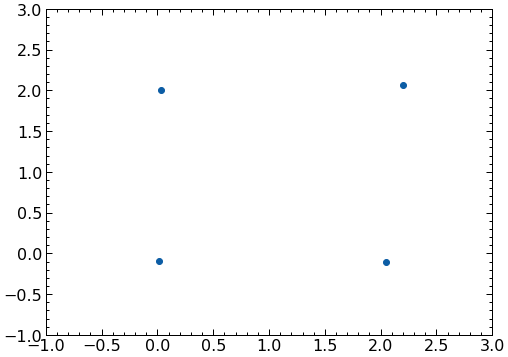

In [28]:
plt.plot(*data.T, 'o')
plt.xlim(-1,3)
plt.ylim(-1,3)
plt.show()

### Construct alpha-complex and compute persistent homology

In [5]:
alpha = gd.AlphaComplex(points=data)
st = alpha.create_simplex_tree()
st.compute_persistence()

There is a finite set of interesting filtration values where the topology changes:

In [27]:
filt_values = set()
for i in st.get_filtration(): filt_values.add(i[1])
filt_values = sorted(list(filt_values))
print(len(filt_values), "filtration values")

8 filtration values


### Visualize complexes at different values of $\alpha$

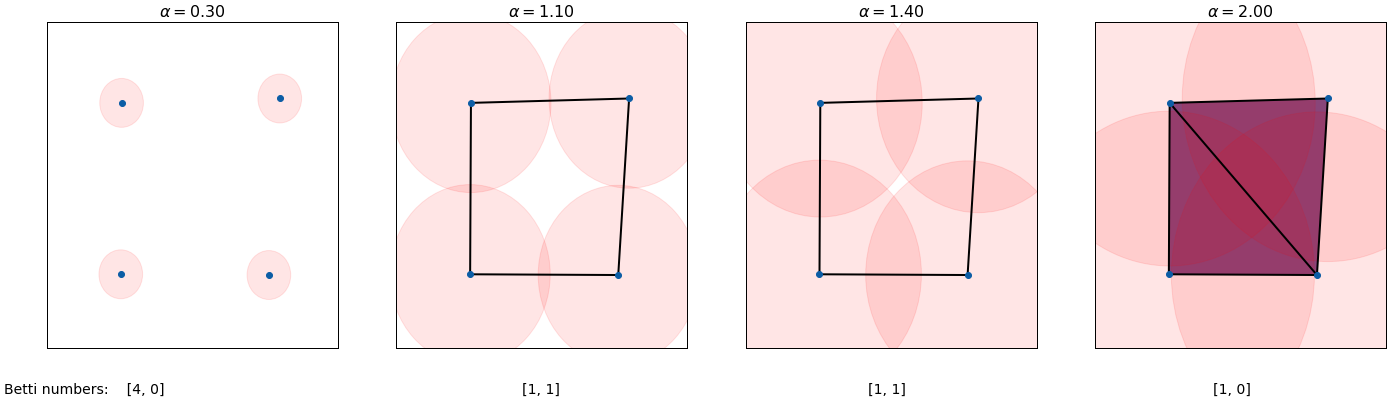

In [56]:
plt.figure(figsize=(24,6))
for i, a in enumerate([0.3, 1.1, 1.4, 2]):
    segments = np.array([s[0] for s in st.get_skeleton(1) if len(s[0]) == 2 and s[1] <= a**2])
    triangles = np.array([s[0] for s in st.get_skeleton(2) if len(s[0]) == 3 and s[1] <= a**2])
    
    plt.subplot(1,4,i+1)
    plt.title(f"$\\alpha = {a:.2f}$")
    for point in data:
        circle = Circle(point, radius=a, color='red', alpha=0.1)
        plt.gca().add_artist(circle)
    if len(triangles) > 0:
        triangulation = Triangulation(*data.T, triangles)
        plt.tripcolor(triangulation, np.ones(len(triangles)), alpha=0.7)
    if len(segments) > 0:
        plt.plot(*data[segments].T, color='k')

    plt.plot(*data.T, 'o')
    plt.xlim(-1,3)
    plt.ylim(-1,3)
    plt.xticks([])
    plt.yticks([])
    
    if i == 0:
        plt.figtext(0.1,0.02, f"Betti numbers:    {st.persistent_betti_numbers(a**2,a**2)}", fontsize=14)
    else:
        plt.figtext(0.2 + 0.2*i,0.02, f"{st.persistent_betti_numbers(a**2,a**2)}", fontsize=14)

plt.show()

### Persistence diagram

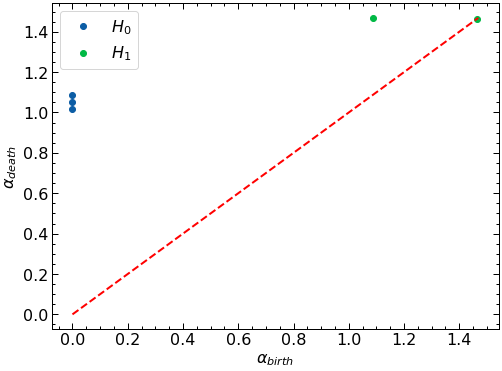

In [62]:
for d in range(2):
    bd = np.sqrt(st.persistence_intervals_in_dimension(d))
    plt.plot(*bd.T, 'o', label=f"$H_{{{d}}}$")
plt.xlabel("$\\alpha_{birth}$")
plt.ylabel("$\\alpha_{death}$")
plt.legend(frameon=True)
min_a = np.sqrt(min(filt_values))
max_a = np.sqrt(max(filt_values))
plt.plot([min_a, max_a], [min_a, max_a], 'r--')
plt.show()

One significant $H_1$ feature present, as expected

## Generate a larger dataset

In [72]:
circle1 = np.random.randn(100, 2)
circle1 *= 2 / np.expand_dims(np.linalg.norm(circle1, axis=1), 1)
circle2 = np.random.randn(50, 2)
circle2 *= 1.4 / np.expand_dims(np.linalg.norm(circle2, axis=1), 1)
data = 0.2*np.random.randn(150, 2) + np.vstack([circle1, 2.5+circle2])

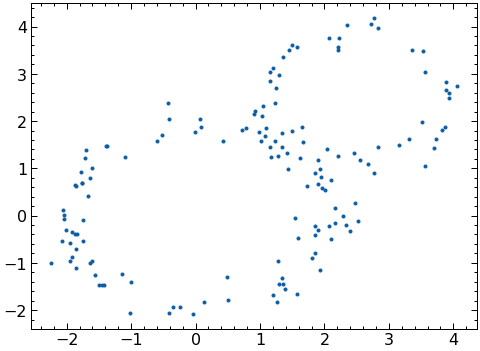

In [75]:
plt.plot(*data.T, '.')
plt.show()

In [74]:
alpha = gd.AlphaComplex(points=data)
st = alpha.create_simplex_tree()
st.compute_persistence()

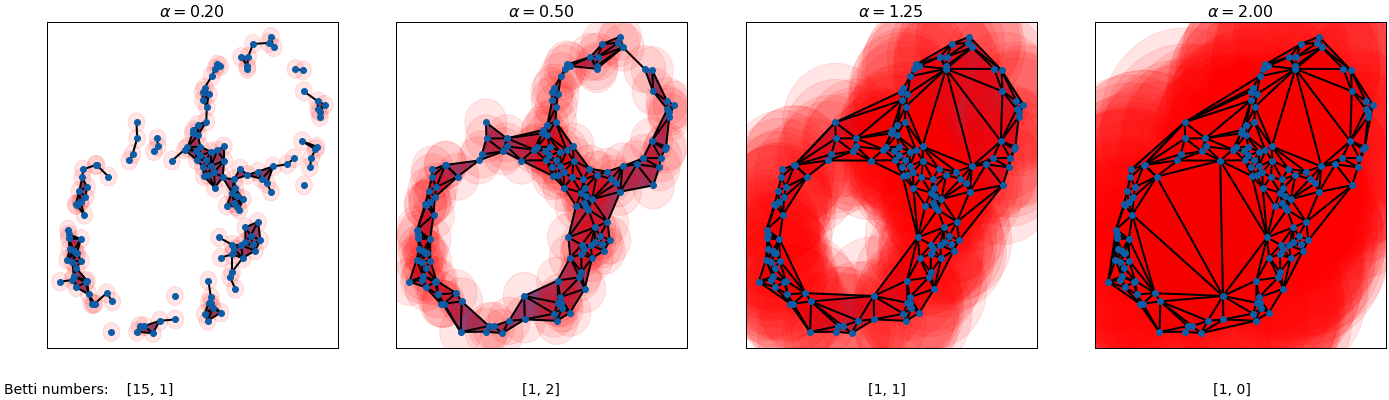

In [81]:
plt.figure(figsize=(24,6))
for i, a in enumerate([0.2, 0.5, 1.25, 2]):
    segments = np.array([s[0] for s in st.get_skeleton(1) if len(s[0]) == 2 and s[1] <= a**2])
    triangles = np.array([s[0] for s in st.get_skeleton(2) if len(s[0]) == 3 and s[1] <= a**2])
    
    plt.subplot(1,4,i+1)
    plt.title(f"$\\alpha = {a:.2f}$")
    for point in data:
        circle = Circle(point, radius=a, color='red', alpha=0.1)
        plt.gca().add_artist(circle)
    if len(triangles) > 0:
        triangulation = Triangulation(*data.T, triangles)
        plt.tripcolor(triangulation, np.ones(len(triangles)), alpha=0.7)
    if len(segments) > 0:
        plt.plot(*data[segments].T, color='k')

    plt.plot(*data.T, 'o')
    plt.xticks([])
    plt.yticks([])
    
    if i == 0:
        plt.figtext(0.1,0.02, f"Betti numbers:    {st.persistent_betti_numbers(a**2,a**2)}", fontsize=14)
    else:
        plt.figtext(0.2 + 0.2*i,0.02, f"{st.persistent_betti_numbers(a**2,a**2)}", fontsize=14)

plt.show()

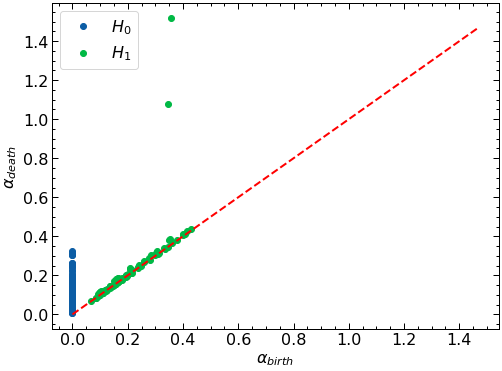

In [78]:
for d in range(2):
    bd = np.sqrt(st.persistence_intervals_in_dimension(d))
    plt.plot(*bd.T, 'o', label=f"$H_{{{d}}}$")
plt.xlabel("$\\alpha_{birth}$")
plt.ylabel("$\\alpha_{death}$")
plt.legend(frameon=True)
min_a = np.sqrt(min(filt_values))
max_a = np.sqrt(max(filt_values))
plt.plot([min_a, max_a], [min_a, max_a], 'r--')
plt.show()

Two significant $H_1$ features present, as expected